In [27]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
np.random.seed(42)
random.seed(42)

In [29]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1)

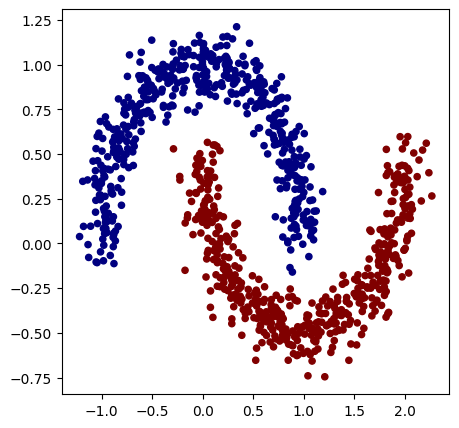

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [32]:
rindinces = np.random.permutation(X.shape[0])
X = X[rindinces]
y = y[rindinces]

def standard_normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized

standard_normalize(X)

TRAIN_SIZE = 80
X_train, X_test = X[:TRAIN_SIZE], X[TRAIN_SIZE:]
y_train, y_test = y[:TRAIN_SIZE], y[TRAIN_SIZE:]

In [33]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [34]:
from neural_network import NeuralNetwork, Layer, Activation
nn = NeuralNetwork(2)

nn.add(Layer(20))
nn.add(Layer(10))
nn.add(Layer(1, activation=Activation.sigmoid))
nn

['Layer1(2, 20)', 'Layer2(20, 10)', 'Layer3(10, 1)']

In [35]:
nn.train(X_train, y_train, learning_rate=0.05, epochs=1000)

Loss at step 1: 0.672712
Loss at step 2: 0.227291
Loss at step 3: 0.215421
Loss at step 4: 0.205165
Loss at step 5: 0.196262
Loss at step 6: 0.188277
Loss at step 7: 0.181131
Loss at step 8: 0.174942
Loss at step 9: 0.169469
Loss at step 10: 0.164511
Loss at step 11: 0.159929
Loss at step 12: 0.155562
Loss at step 13: 0.151413
Loss at step 14: 0.147520
Loss at step 15: 0.143930
Loss at step 16: 0.140589
Loss at step 17: 0.137506
Loss at step 18: 0.134657
Loss at step 19: 0.132012
Loss at step 20: 0.129541
Loss at step 21: 0.127227
Loss at step 22: 0.125033
Loss at step 23: 0.122956
Loss at step 24: 0.121006
Loss at step 25: 0.119171
Loss at step 26: 0.117440
Loss at step 27: 0.115815
Loss at step 28: 0.114289
Loss at step 29: 0.112837
Loss at step 30: 0.111453
Loss at step 31: 0.110143
Loss at step 32: 0.108900
Loss at step 33: 0.107719
Loss at step 34: 0.106594
Loss at step 35: 0.105523
Loss at step 36: 0.104500
Loss at step 37: 0.103523
Loss at step 38: 0.102595
Loss at step 39: 0.10

In [36]:
preds = nn.predict(X_test)

In [37]:
binary_preds = (preds >= 0.5).astype(int)

In [38]:
correct_predictions = (binary_preds == y_test)

In [39]:
accuracy = np.sum(correct_predictions) / len(y_test)
accuracy

0.9108695652173913